Before you begin, execute this cell to import numpy and packages from the D-Wave Ocean suite, and all necessary functions for the gate-model framework you are going to use, whether that is the Forest SDK or Qiskit. In the case of Forest SDK, it also starts the qvm and quilc servers.

In [1]:
%run -i "assignment_helper.py"
%matplotlib inline

Available frameworks:
Qiskit
D-Wave Ocean



# Unitary evolution

**Exercise 1** (1 point). The conjugate transpose of a unitary matrix is its inverse. Write a function that checks if a $2\times 2$ numpy array is unitary.

In [2]:
Identity_2x = np.array([[1., 0.], [0., 1.]])

def is_unitary(matrix):
    return (np.matmul(matrix, matrix.T.conj()).round() == Identity_2x).all()

In [3]:
X = np.array([[0, 1], [1, 0]])
H = 1/np.sqrt(2)*np.array([[1, 1], [1, -1]])
random_matrix = np.random.rand(2, 2)
assert is_unitary(X)
assert is_unitary(H)
assert not is_unitary(random_matrix)

**Exercise 2** (1 point). The eigenvalues of unitary operators always lie on the complex unit circle. We exploit this property over and over again. For instance, the quantum phase estimation algorithm estimates the eigenvalues through the phase that describes the eigenvalues angle on the complex unit circle. Calculate the eigenvalues of the Hadamard gate and store them in a numpy array called `eigenvalues`.

In [4]:
eigenvalues = [1/np.sqrt(2), -1/np.sqrt(2)]


In [5]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


**Exercise 3** (1 point). Unitary operations are reversible. In fact, we often reverse them on purpose: this is called uncomputing, and used, for instance, in the quantum matrix inversion algorithm that underlies many coherent quantum machine learning protocols. The reason we do that is to remove the entanglement we might have created, so that tracing out a subsystem would not interfere with our calculations (the remaining system will not be a mixed state). Create a circuit in your preferred framework that applies the X and H gates in this sequence. The circuit should be in an object called `circuit`.

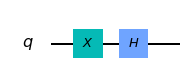

In [18]:
from qiskit import QuantumCircuit
circuit = QuantumCircuit(1)

circuit.x(0) # X gate
circuit.h(0) # hardaman gate
circuit.draw(output='mpl')

In [9]:
amplitudes = get_amplitudes(circuit)
assert np.allclose(amplitudes, np.array([1/np.sqrt(2), -1/np.sqrt(2)]))

**Exercise 4** (1 point). Extend this circuit to reverse the calculations you have done.

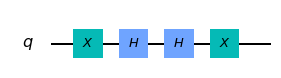

In [19]:
circuit.h(0) # hardaman gate
circuit.x(0) # X gate

circuit.draw(output='mpl')


In [20]:
amplitudes = get_amplitudes(circuit)
program_length = get_circuit_length(circuit)
assert np.allclose(amplitudes, np.array([1, 0])), "The circuit is not successfully reversed"
assert program_length == 4, "The circuit does not have the right number of gates"

# Interaction with the environment: open systems

**Exercise 5** (2 points). Contemporary quantum computers are open systems: they interact with the environment. The nature of the interaction can often be characterized by noise models. Even if the system starts in a pure state, the interaction with the environment will turn it into a mixed state. The state loses coherence (the off-diagonal terms in the density matrix). Furthermore, increasing noise may completely destroy entanglement, so we can no longer use it as a resource for calculations. In general, it is a very hard problem to tell how much noise can be tolerated so that the remaining state is still useful for some calculations.

We introduced a simple function called `mixed_state` that interpolated a pure state with the maximally mixed state $\mathbb{1}/d$, where $d$ is the dimension of the system. We also talked about thermal states: at infinite temperature, you recover the uniform distribution over the energy levels of the system. This is, in fact, is just the maximally mixed state.

We talk about energy levels and Hamiltonians in the subsequent notebook. For the time being, imagine that you have a qubit system: this has two levels, in other words, two possible energies. Let's make these -1.0 and +1.0. The thermal state of this qubit will have the Boltzmann distribution in its diagonal. Calculate this density matrix at temperature $T=1$ and store it in a numpy array called `dm`.

In [1]:
import numpy as np
energies = np.array([-1.0, +1.0])
T = 1


dm = np.array([[np.exp(2)/(np.exp(2) + 1), 0], [0, 1/(np.exp(2) + 1)]])
print(dm)


[[0.88079708 0.        ]
 [0.         0.11920292]]


In [ ]:
###
### AUTOGRADER TEST - DO NOT REMOVE
###


The thermal state itself is interesting for calculations. It is the property of a system in equilibrium with the environment. Classical simulations of achieving an equilibrium are often computationally expensive: for instance, inference in probabilistic graphical models requires this. This is where quantum protocols that create a thermal state become important.